## Assignment 06  🧩

**Aim:**  Implement Reinforcement Learning using an example of a maze environment that the
agent needs to explore.

**Student:** Kanaka Amin 
**Class:** BE | **Roll No:** 42501

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
maze = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [2, 1, 3, 0]
])

**0** represents free spaces. <br>
**1** represents walls or obstacles.<br>
**2** is the start point.<br>
**3** is the goal.<br>

In [4]:
# Maze dimensions
rows, cols = maze.shape

In [5]:
# Define the start and goal positions
start = (3, 0)
goal = (3, 2)

In [6]:
# Possible actions (up, down, left, right)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [7]:
# Parameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.1  # Exploration rate

* Learning rate: Determines how much the model adjusts its parameters based on the error during training.

* Discount factor: In reinforcement learning, it determines the importance of future rewards relative to immediate ones.

* Exploration rate: Controls the balance between exploring new actions and exploiting known good ones in reinforcement learning.

In [8]:
# Q-table (Initialize Q-values for each state-action pair)
Q = np.zeros((rows, cols, len(actions)))

In [9]:
# Function to check if a position is valid
def is_valid(pos):
    return 0 <= pos[0] < rows and 0 <= pos[1] < cols and maze[pos] != 1

In [10]:
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(len(actions))  # Explore
    else:
        return np.argmax(Q[state[0], state[1], :])  # Exploit

## Q-learning : 
* Used in reinforcement learning
* 

In [11]:
def update_q(state, action, reward, next_state):
    old_q = Q[state[0], state[1], action]
    next_max_q = np.max(Q[next_state[0], next_state[1], :])
    Q[state[0], state[1], action] = old_q + alpha * (reward + gamma * next_max_q - old_q)

In [12]:
# Training the agent
def train_agent(episodes=1000):
    for _ in range(episodes):
        state = start
        while state != goal:
            action = choose_action(state)
            next_state = (state[0] + actions[action][0], state[1] + actions[action][1])

            if not is_valid(next_state):
                next_state = state  # If the action leads to an invalid state, stay in the same place
                reward = -1  # Penalty for hitting a wall
            elif next_state == goal:
                reward = 10  # Reward for reaching the goal
            else:
                reward = -0.1  # Small negative reward for each step taken

            update_q(state, action, reward, next_state)
            state = next_state

In [13]:
# Train the agent
train_agent()

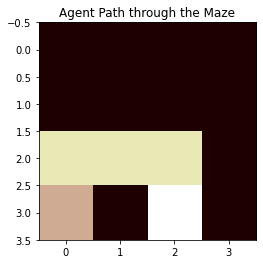

In [14]:
def plot_maze():
    path = np.zeros((rows, cols))
    state = start
    path[state] = 2  # Mark start
    while state != goal:
        action = np.argmax(Q[state[0], state[1], :])
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        if not is_valid(next_state) or state == next_state:
            break  # Stop if stuck
        state = next_state
        path[state] = 3  # Mark path
    path[goal] = 4  # Mark goal
    
    plt.imshow(path, cmap='pink', interpolation='nearest')
    plt.title('Agent Path through the Maze')
    plt.show()

# Plot the maze with the agent's path
plot_maze()

In [15]:
# Visualizing the learned path
def visualize_path():
    state = start
    path = [state]  # Initialize path with the start state
    while state != goal:
        action = np.argmax(Q[state[0], state[1], :])
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        if not is_valid(next_state) or state == next_state:
            break  # Stop if stuck
        state = next_state
        path.append(state)  # Append the next state to the path
    if state == goal:
        print("Path taken by the agent (from start to goal):")
        print(" -> ".join(str(step) for step in path))
    else:
        print("The agent could not find a path to the goal.")

# Visualize the path
visualize_path()

Path taken by the agent (from start to goal):
(3, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (3, 2)


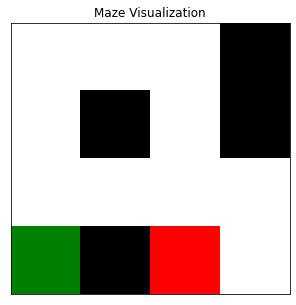

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class Maze:
    def __init__(self, maze):
        self.maze = maze
        self.start_position = self.find_position(2)  # Position of '2' (start)
        self.goal_position = self.find_position(3)   # Position of '3' (goal)
        self.agent_position = self.start_position    # Initialize the agent at the start position

    def find_position(self, value):
        # Find the (row, col) position of the given value (start or goal)
        result = np.where(self.maze == value)
        return (result[0][0], result[1][0])
    
    def set_agent_position(self, pos):
        self.agent_position = pos

    def render(self):
        # Create a copy of the maze to visualize
        visual_maze = self.maze.copy()
        
        # Highlight the agent's position (using a distinct marker)
        agent_x, agent_y = self.agent_position
        visual_maze[agent_x, agent_y] = 9  # Mark the agent's position with '9'
        
        # Create a color map for visualization
        color_map = {
            0: 'white',  # Free space
            1: 'black',  # Wall
            2: 'blue',   # Start position
            3: 'red',    # Goal position
            9: 'green'   # Agent's current position
        }

        # Prepare the grid for visualization
        fig, ax = plt.subplots(figsize=(5, 5))
        for i in range(visual_maze.shape[0]):
            for j in range(visual_maze.shape[1]):
                color = color_map[visual_maze[i, j]]
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
        
        # Set grid and title
        plt.xlim(0, visual_maze.shape[1])
        plt.ylim(0, visual_maze.shape[0])
        plt.gca().invert_yaxis()
        plt.xticks([])  # Hide x-axis ticks
        plt.yticks([])  # Hide y-axis ticks
        plt.title('Maze Visualization')
        plt.show()

# Example usage
maze_data = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [2, 1, 3, 0]
])

maze = Maze(maze_data)
maze.render()  # Render the initial state
